In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
G = nx.read_gpickle("../G.pickle")
G_undirected = G.to_undirected()

In [4]:
def get_GCC(G):
    gcc = max(nx.connected_components(G), key=len)
    G_gcc = G.subgraph(gcc)
    print(f"The original network has {len(G)} nodes. The GCC subgraph has {len(G_gcc)}.")
    return G_gcc

In [5]:
G_gcc = get_GCC(G_undirected)

The original network has 1983 nodes. The GCC subgraph has 1950.


In [6]:
def shortest_path_between_nodes(G, node1, node2):
    shortest_path = nx.shortest_path(G, source=node1, target=node2)
    print(f"The shortest path between {node1} and {node2} has length {len(shortest_path)} and consists of:\n"
          f"{shortest_path}")
    return shortest_path

In [7]:
_ = shortest_path_between_nodes(G_gcc, "Michael Jackson", "Britney Spears")

The shortest path between Michael Jackson and Britney Spears has length 3 and consists of:
['Michael Jackson', 'Alanis Morissette', 'Britney Spears']


In [8]:
def find_most_connected(G, most_connected, N=5):
    most_connected_list = [x for x in sorted(((n, G.degree(n)) for n in G.nodes()),
                                        key=lambda t: t[1],
                                        reverse=most_connected)][:N]
    most_or_least = "least" if not most_connected else "most"
    print(f"The {N} {most_or_least} connected nodes are: {most_connected_list}")


In [9]:
find_most_connected(G_gcc, most_connected=True)
find_most_connected(G_gcc, most_connected=False)

The 5 most connected nodes are: [('Alanis Morissette', 123), ('Bob Dylan', 118), ('The Beatles', 84), ('U2', 82), ('Madonna', 79)]
The 5 least connected nodes are: [('Dr. Demento', 1), ('Harvey Danger', 1), ('Marcy Playground', 1), ('Semisonic', 1), ('The Rembrandts', 1)]


In [10]:
_ = shortest_path_between_nodes(G_gcc, "Alanis Morissette", "The Rembrandts")

The shortest path between Alanis Morissette and The Rembrandts has length 3 and consists of:
['Alanis Morissette', '"Weird Al" Yankovic', 'The Rembrandts']


In [11]:
nx.average_shortest_path_length(G_gcc)

3.7998768599281685

In [12]:
def node_pair_id(node1, node2):
    return "___".join(sorted([node1, node2]))


In [20]:
pair_id_to_nodes = {node_pair_id(node1, node2): (node1, node2) 
                        for node1 in G_gcc.nodes() 
                        for node2 in G_gcc.nodes()}

pair_id_to_path_length = {pair_id: len(nx.shortest_path(G_gcc, node1, node2))
                          for pair_id, (node1, node2) in pair_id_to_nodes.items()}

In [15]:
# plt.hist([v for v in pair_id_to_path_length.values()])
len(pair_id_to_path_length)

1902225

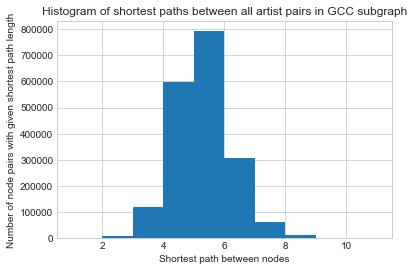

In [30]:
plt.hist([v for v in pair_id_to_path_length.values()])
plt.title("Histogram of shortest paths between all artist pairs in GCC subgraph")
plt.xlabel("Shortest path between nodes")
plt.ylabel("Number of node pairs with given shortest path length")
plt.show()

As seen on the histogram, the path distance between each node concentrates around 5. The highest distance is 11, and the most distant nodes are: 'Dark Funeral' and 'GWAR, 'Dark Funeral' and 'Reverend Horton Heat', 'Dark Funeral' and 'Scott Joplin'. TODO: explain who are these and hypothesise they might be apart (different geography, genre?)

In [33]:
max_dist =  max(pair_id_to_path_length.values())

[(k, v) for k, v in pair_id_to_path_length.items() if v == max_dist]

[('Dark Funeral___GWAR', 11),
 ('Dark Funeral___Reverend Horton Heat', 11),
 ('Dark Funeral___Scott Joplin', 11)]